# Graded Lab 1: Fully-Connected Challenge

In this lab you will experiment with whatever fully-connected architecture/design you'd like on the dataset provided. You will also get practice coding in Google's Collaboratory environment.

### Group#: 1

 - Jibin George (0832593)
 - Jibin Kuruppassery Sebastian (0829897)
 - Kailas Krishnan Radhakrishnan Sudhadevi (0850313)
 - Vishal Ramesh Babu (0832438)

## Lab Outline

This lab has 2 parts:

- **Part 1**: Create the network
- **Part 2**: Describe your experiments

## What to submit

 - A link to the completed .ipynb file on Google Colab where all code has been executed and all output is visible
 - A PDF/HTML version of the above file
 - **One submission per group**



<a id="cell2"></a>
## Part 1: Creating the network (50% of grade)

**Grading Note:**
> You will lose marks for the following:
> - code with errors
> - code that is not needed (including import statements) to solve the problem
> - messy or unclear coding (it should be easy to follow the logic of your code, given the problem)
> - code that uses other packages than the ones specified
> - unexecuted code

**Goal:** A demonstrated effort to achieve as high an accuracy on this dataset as possible.

**Data split** The data should be split into approximately 70% for training, 20% for validation, and 10% for testing.

**Implementation** All code should be in Keras/python and/or the packages we have installed in class.

### Some things you can try:

Things that you can experiment with:
 - number of layers
 - number of neurons per layer
 - types of activation functions
 - optimizers
 - batch sizes
 - learning rate
 - dropout layer (or not) and dropout rate
 - any other valid adjustment to the architecture as long as it remains a fully-connected network


### Tips for training
When building/tuning your model, keep in mind the following points:

- This is experimental, so be driven by results achieved on the validation set as opposed to what you have heard/read works well or doesn't
- If the hyperparameters are working well, you should see improvement in the loss/accuracy within approximately one epoch
- For hyperparameter tuning: start by testing a large range of hyperparameters for just a few training iterations to find the combinations of parameters that are working at all
- Once you have found some sets of hyperparameters that seem to work, search more finely around these parameters. You may need to train for more epochs.
- Prefer random search to grid search for hyperparameters
- You should use the validation set for hyperparameter search and for evaluating different architectures
- The test set should only be used at the very end to evaluate your final model

### What to provide

The cell below should contain all the code necessary to run your final network on the dataset. All necessary hyperparameters should be visible either in the code or through comments. Your code should include 2 plots: one for training and validation loss per epoch and one for training and validation accuracy per epoch.  

You should also evaluate and report the accuracy on the test set. The test set should be used only once. That is, after you have decided on what to include in your network and tuned any hyperparameters for your final network, you should use this final network on the test set and calculate the accuracy.  

**Please make sure that all code has been run and the output is visible in the notebook before submitting.**

## Preparing the data

To have access to the data in your Google Drive, you will need to run the following code to 'mount' your Drive so it is accessible to the notebook you are running on Google Colab. When you run the code, following the instructions so that your notebook can access the data.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Now, you need to convert the images you just uploaded into a data structure similar to the MNIST data from Practice Lab 2. The number of images and the pixel dimensions are, however, different than the MNIST data.

**The goal here is to get the data into the correct shape so that you can use it with a fully connected neural network.**

To accomplish this task, you will need to:
 - load the images from the various folders of the provided data
 - make sure they are grayscale and not RGB
 - convert the images to NumPy arrays
 - resize any images that are not the correct size
     - any images with a height or width over 128 pixels should be rescaled so that dimension is 128
 - store these arrays in the proper shape in an appropriate data structure
 - create a target array to keep track of the proper class of each image in your data
 - view a few images after processing to verify that everything is working as it should
 - convert image arrays to one-dimensional and scale the pixel values so they are between 0 and 1
 - verify the images and target arrays have the correct dimensions
 - convert string labels to integers

Aside from the packages imported below, you may find the following helpful to process the images properly:
 - [info](https://realpython.com/python-pathlib/) on `Path` so you know how to create a path to the images
 - the `.name` method that can the file or directory name from a `Path` object
 - the `.reshape()` method
 - the `.append()` method

**Note that not all of the tasks above have starter code below, so be sure you have completed all tasks.**

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
from keras.layers import Dense, Input, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras import initializers

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import keras

Fill in the missing elements (i.e., all the `None`'s) of the starter code below.

In [ ]:
p = Path().cwd()
q = p / "drive/MyDrive/Lego/Lego"

target_dict = {"brick 1x2" : 0, "brick 2x2" : 1, "brick 2x4" : 2, "plate 1x2" : 3, "plate 2x2" : 4, "plate 2x4" : 5}
images = []
labels = []

for fldr in q.iterdir():
    current_label = fldr.name
    for img in fldr.iterdir():
        img = load_img(img, color_mode = "grayscale")
        img_array = img_to_array(img)
        img_array_resized = smart_resize(img_array, size = (128, 128))
        img_array_reshaped = img_array_resized.reshape(128, 128)
        images.append(img_array_reshaped)
        labels.append(current_label)

images = np.array(images)
labels = np.array(labels)

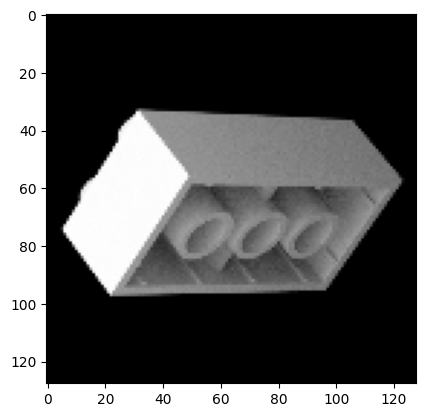

In [ ]:
# use plt.imshow() to view a few of the grayscale images

plt.imshow(images[4000], cmap='gray')

In [ ]:
labels_int = np.array([target_dict[i] for i in labels])

### Build, tune, and evaluate the network

In [ ]:
X, test_images, Y , test_labels = train_test_split(images, labels_int, test_size = 0.1, stratify = labels_int, random_state = 123)

In [ ]:
train_images, val_images, train_labels, val_labels = train_test_split(X , Y, test_size = 0.25, stratify = Y, random_state = 123)

In [ ]:
train_images.shape, train_labels.shape, val_images.shape, val_labels.shape, test_images.shape, test_labels.shape

((3240, 128, 128), (3240,), (1080, 128, 128), (1080,), (480, 128, 128), (480,))

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 128 * 128)
val_images = val_images.reshape(val_images.shape[0], 128 * 128)

train_images = train_images.astype('float32')/255
val_images = val_images.astype('float32')/255

train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

## Experiment 1

- Creating a base network with random set of nuerons, layers, epochs and batch_size

In [ ]:
network_1 = keras.Sequential(
    [
        Input(shape = (128 * 128,)),
        Dense(512, activation = 'relu'),
        Dense(256, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(6, activation = 'softmax')
    ]
)

network_1.summary()

network_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_1 = network_1.fit(train_images, train_labels, epochs = 16, batch_size = 64, verbose = 1, validation_data = (val_images, val_labels))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,554,118 (32.63 MB)

 Trainable params: 8,554,118 (32.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.5120 - loss: 1.2650 - val_accuracy: 0.7787 - val_loss: 0.6453
Epoch 2/16
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7565 - loss: 0.6318 - val_accuracy: 0.7870 - val_loss: 0.5826
Epoch 3/16
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8468 - loss: 0.4741 - val_accuracy: 0.7935 - val_loss: 0.5658
Epoch 4/16
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8680 - loss: 0.4219 - val_accuracy: 0.8093 - val_loss: 0.5227
Epoch 5/16
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8641 - loss: 0.4093 - val_accuracy: 0.8454 - val_loss: 0.4479
Epoch 6/16
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8837 - loss: 0.3462 - val_accuracy: 0.8185 - val_loss: 0.5372
Epoch 7/16
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9024 - loss: 0.2830 - val_accuracy: 0.8704 - val_loss: 0.4054
Epoch 8/16
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9190 - loss: 0.2364 - val_accuracy: 0.8528 - val_los

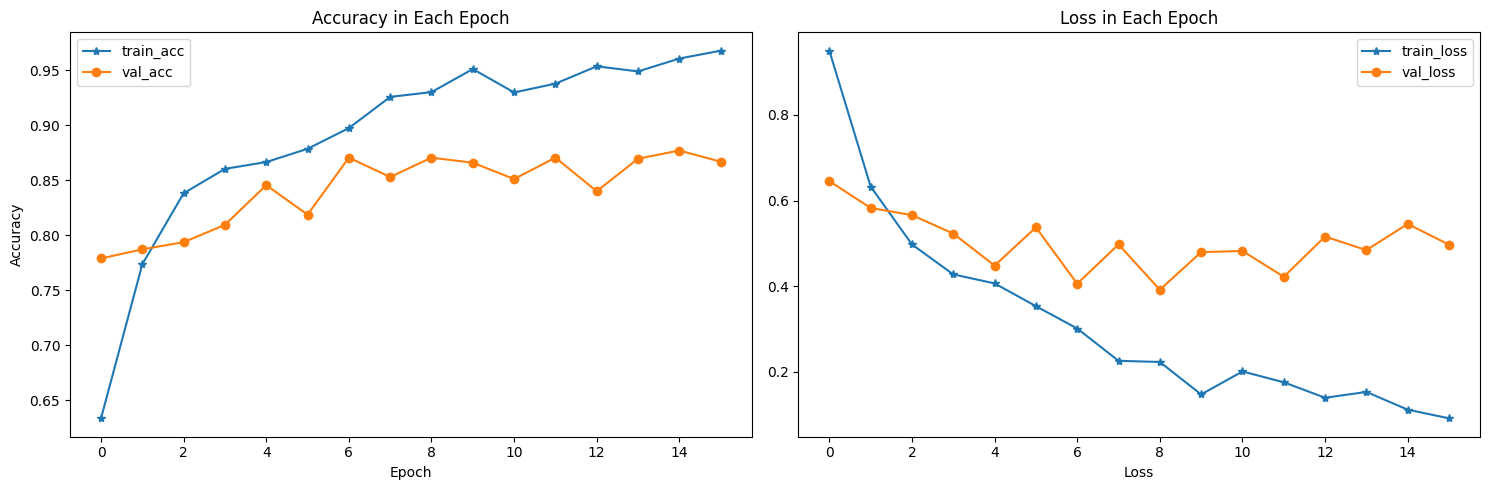

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.plot(model_1.history['accuracy'], marker = '*')
ax1.plot(model_1.history['val_accuracy'], marker = 'o')
ax1.legend(["train_acc", "val_acc"])
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.set_title("Accuracy in Each Epoch")

ax2.plot(model_1.history['loss'], marker = '*')
ax2.plot(model_1.history['val_loss'], marker = 'o')
ax2.legend(["train_loss", "val_loss"])
ax2.set_xlabel("Epoch")
ax2.set_xlabel("Loss")
ax2.set_title("Loss in Each Epoch")

plt.tight_layout()
plt.show()

## Experiment 2

- Added Dropout Layer, increased the number of layers and epochs

In [ ]:
network_2 = keras.Sequential(
    [
        Input(shape = (128 * 128,)),
        Dense(512, activation = 'relu'),
        Dense(256, activation = 'relu'),
        Dropout(0.4),
        Dense(256, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(6, activation = 'softmax')
    ]
)

network_2.summary()

network_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_2 = network_2.fit(train_images, train_labels, epochs = 25, batch_size = 64, verbose = 1, validation_data = (val_images, val_labels))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,619,910 (32.88 MB)

 Trainable params: 8,619,910 (32.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.4620 - loss: 1.2995 - val_accuracy: 0.7315 - val_loss: 0.7244
Epoch 2/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6975 - loss: 0.7770 - val_accuracy: 0.8019 - val_loss: 0.5875
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7869 - loss: 0.6120 - val_accuracy: 0.8176 - val_loss: 0.5447
Epoch 4/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8073 - loss: 0.5640 - val_accuracy: 0.7833 - val_loss: 0.6170
Epoch 5/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8202 - loss: 0.5102 - val_accuracy: 0.8278 - val_loss: 0.5450
Epoch 6/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8608 - loss: 0.4327 - val_accuracy: 0.8269 - val_loss: 0.5174
Epoch 7/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8503 - loss: 0.4478 - val_accuracy: 0.8444 - val_loss: 0.4484
Epoch 8/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8914 - loss: 0.3148 - val_accuracy: 0.8583 - val_loss

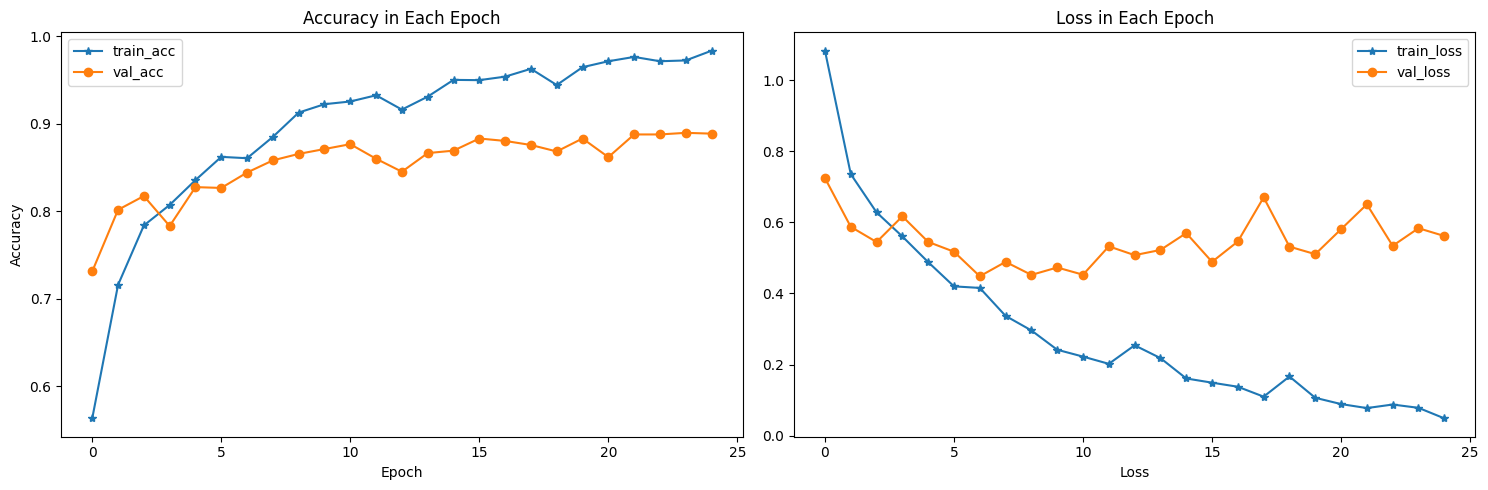

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.plot(model_2.history['accuracy'], marker = '*')
ax1.plot(model_2.history['val_accuracy'], marker = 'o')
ax1.legend(["train_acc", "val_acc"])
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.set_title("Accuracy in Each Epoch")

ax2.plot(model_2.history['loss'], marker = '*')
ax2.plot(model_2.history['val_loss'], marker = 'o')
ax2.legend(["train_loss", "val_loss"])
ax2.set_xlabel("Epoch")
ax2.set_xlabel("Loss")
ax2.set_title("Loss in Each Epoch")

plt.tight_layout()
plt.show()

## Experiment 3

- Increased the number of Dense and Dropout layers

In [ ]:
network_3 = keras.Sequential(
    [
        Input(shape = (128 * 128,)),
        Dense(1024, activation = 'relu'),
        Dense(512, activation = 'relu'),
        Dropout(0.4),
        Dense(512, activation = 'relu'),
        Dense(256, activation = 'relu'),
        Dropout(0.5),
        Dense(256, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dropout(0.4),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(6, activation = 'softmax')
    ]
)

network_3.summary()

network_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_3 = network_3.fit(train_images, train_labels, epochs = 25, batch_size = 64, verbose = 1, validation_data = (val_images, val_labels))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 1024)                │      16,778,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,829,510 (68.01 MB)

 Trainable params: 17,829,510 (68.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.2491 - loss: 1.6830 - val_accuracy: 0.5491 - val_loss: 1.0877
Epoch 2/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5017 - loss: 1.0941 - val_accuracy: 0.7306 - val_loss: 0.7491
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6325 - loss: 0.8562 - val_accuracy: 0.7019 - val_loss: 0.7253
Epoch 4/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6942 - loss: 0.7639 - val_accuracy: 0.7287 - val_loss: 0.6818
Epoch 5/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7418 - loss: 0.6634 - val_accuracy: 0.8009 - val_loss: 0.6242
Epoch 6/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7965 - loss: 0.6145 - val_accuracy: 0.8056 - val_loss: 0.5665
Epoch 7/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8147 - loss: 0.5693 - val_accuracy: 0.8167 - val_loss: 0.5416
Epoch 8/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8328 - loss: 0.4980 - val_accuracy: 0.8148 - val_l

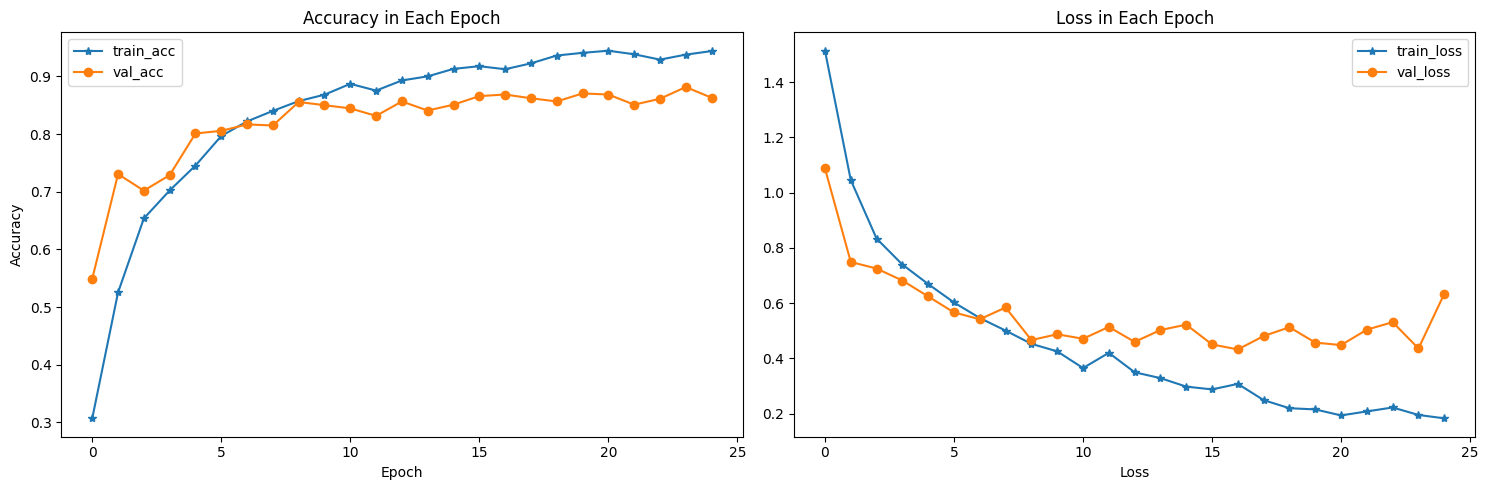

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.plot(model_3.history['accuracy'], marker = '*')
ax1.plot(model_3.history['val_accuracy'], marker = 'o')
ax1.legend(["train_acc", "val_acc"])
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.set_title("Accuracy in Each Epoch")

ax2.plot(model_3.history['loss'], marker = '*')
ax2.plot(model_3.history['val_loss'], marker = 'o')
ax2.legend(["train_loss", "val_loss"])
ax2.set_xlabel("Epoch")
ax2.set_xlabel("Loss")
ax2.set_title("Loss in Each Epoch")

plt.tight_layout()
plt.show()

## Experiment 4
- Took the same network from experiment 2 and increased the batch size.

In [ ]:
adam = Adam(learning_rate = 0.0002)

network_4 = keras.Sequential(
    [
        Input(shape = (128 * 128,)),
        Dense(512, activation = 'relu'),
        Dense(256, activation = 'relu'),
        Dropout(0.4),
        Dense(256, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(6, activation = 'softmax')
    ]
)

network_4.summary()

network_4.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_4 = network_4.fit(train_images, train_labels, epochs = 25, batch_size = 128, verbose = 1, validation_data = (val_images, val_labels))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,619,910 (32.88 MB)

 Trainable params: 8,619,910 (32.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.3547 - loss: 1.4761 - val_accuracy: 0.7074 - val_loss: 0.8128
Epoch 2/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6441 - loss: 0.8723 - val_accuracy: 0.7028 - val_loss: 0.7377
Epoch 3/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7291 - loss: 0.7424 - val_accuracy: 0.7917 - val_loss: 0.6321
Epoch 4/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7784 - loss: 0.6566 - val_accuracy: 0.8009 - val_loss: 0.5937
Epoch 5/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7835 - loss: 0.6180 - val_accuracy: 0.8185 - val_loss: 0.5449
Epoch 6/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8203 - loss: 0.5480 - val_accuracy: 0.8315 - val_loss: 0.5290
Epoch 7/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8426 - loss: 0.4985 - val_accuracy: 0.8537 - val_loss: 0.4715
Epoch 8/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8605 - loss: 0.4625 - val_accuracy: 0.8528 - v

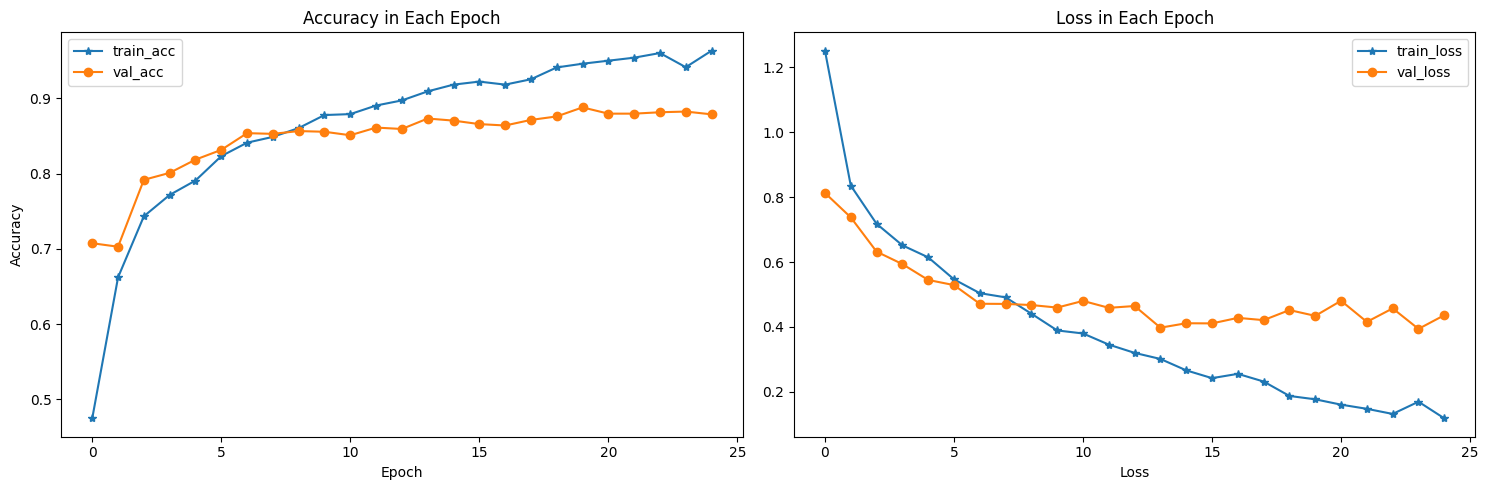

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.plot(model_4.history['accuracy'], marker = '*')
ax1.plot(model_4.history['val_accuracy'], marker = 'o')
ax1.legend(["train_acc", "val_acc"])
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.set_title("Accuracy in Each Epoch")

ax2.plot(model_4.history['loss'], marker = '*')
ax2.plot(model_4.history['val_loss'], marker = 'o')
ax2.legend(["train_loss", "val_loss"])
ax2.set_xlabel("Epoch")
ax2.set_xlabel("Loss")
ax2.set_title("Loss in Each Epoch")

plt.tight_layout()
plt.show()

## Experiment 5

- Added Weight and Bias Initializers

In [ ]:
network_5 = keras.Sequential(
    [
        Input(shape = (128 * 128,)),
        Dense(512, activation = 'relu', kernel_initializer = initializers.RandomNormal(stddev = 0.01), bias_initializer = initializers.Ones()),
        Dense(256, activation = 'relu'),
        Dropout(0.4),
        Dense(256, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(6, activation = 'softmax')
    ]
)

network_5.summary()

network_5.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_5 = network_5.fit(train_images, train_labels, epochs = 25, batch_size = 64, verbose = 1, validation_data = (val_images, val_labels))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,619,910 (32.88 MB)

 Trainable params: 8,619,910 (32.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.3893 - loss: 1.7001 - val_accuracy: 0.7556 - val_loss: 0.6848
Epoch 2/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6819 - loss: 0.8238 - val_accuracy: 0.7426 - val_loss: 0.6788
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7245 - loss: 0.7129 - val_accuracy: 0.8065 - val_loss: 0.5624
Epoch 4/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7678 - loss: 0.6368 - val_accuracy: 0.7889 - val_loss: 0.5695
Epoch 5/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8089 - loss: 0.5427 - val_accuracy: 0.8269 - val_loss: 0.5015
Epoch 6/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8467 - loss: 0.4701 - val_accuracy: 0.8167 - val_loss: 0.5079
Epoch 7/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8603 - loss: 0.4263 - val_accuracy: 0.8389 - val_loss: 0.4815
Epoch 8/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8659 - loss: 0.4046 - val_accuracy: 0.8583 - val_lo

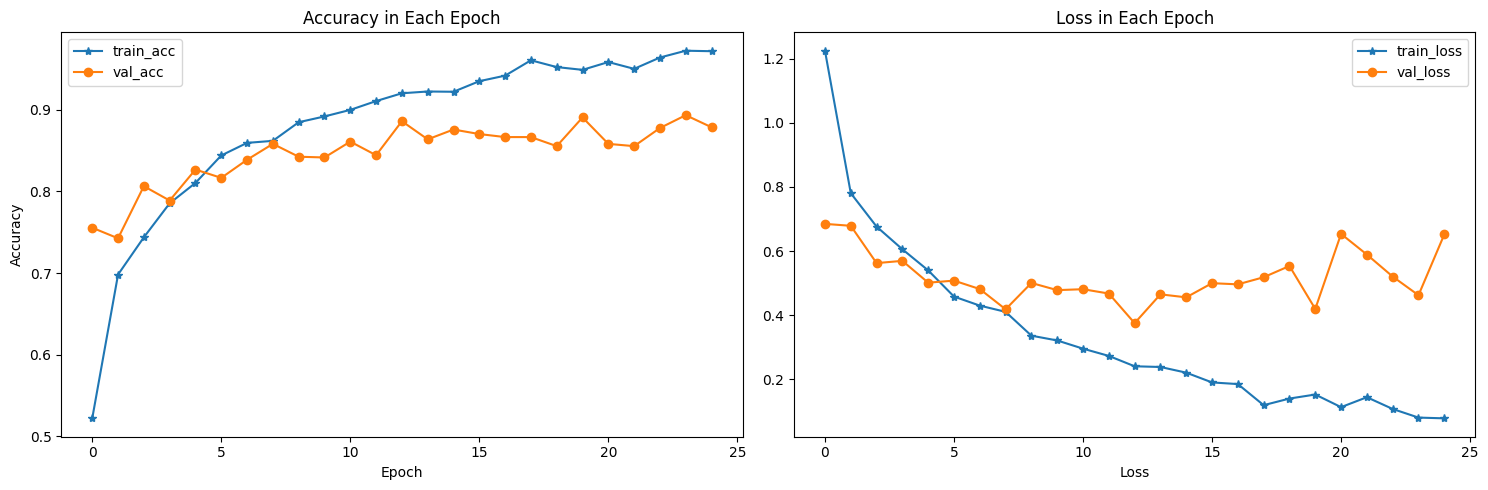

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.plot(model_5.history['accuracy'], marker = '*')
ax1.plot(model_5.history['val_accuracy'], marker = 'o')
ax1.legend(["train_acc", "val_acc"])
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.set_title("Accuracy in Each Epoch")

ax2.plot(model_5.history['loss'], marker = '*')
ax2.plot(model_5.history['val_loss'], marker = 'o')
ax2.legend(["train_loss", "val_loss"])
ax2.set_xlabel("Epoch")
ax2.set_xlabel("Loss")
ax2.set_title("Loss in Each Epoch")

plt.tight_layout()
plt.show()

## Experiment 6

- Used RandomUniform instead of RandomNormal

In [ ]:
network_6 = keras.Sequential(
    [
        Input(shape = (128 * 128,)),
        Dense(512, activation = 'relu', kernel_initializer = initializers.RandomUniform(minval=-1.0, maxval=1.0), bias_initializer = initializers.Ones()),
        Dense(256, activation = 'relu'),
        Dropout(0.4),
        Dense(256, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(6, activation = 'softmax')
    ]
)

network_6.summary()

network_6.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_6 = network_6.fit(train_images, train_labels, epochs = 25, batch_size = 64, verbose = 1, validation_data = (val_images, val_labels))

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,619,910 (32.88 MB)

 Trainable params: 8,619,910 (32.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.3853 - loss: 3.9349 - val_accuracy: 0.7046 - val_loss: 0.7651
Epoch 2/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6442 - loss: 0.9004 - val_accuracy: 0.7611 - val_loss: 0.6314
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7137 - loss: 0.7320 - val_accuracy: 0.7620 - val_loss: 0.6146
Epoch 4/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7381 - loss: 0.6578 - val_accuracy: 0.8120 - val_loss: 0.5591
Epoch 5/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8022 - loss: 0.5438 - val_accuracy: 0.8185 - val_loss: 0.5162
Epoch 6/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8035 - loss: 0.5171 - val_accuracy: 0.8315 - val_loss: 0.4752
Epoch 7/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8400 - loss: 0.4517 - val_accuracy: 0.8398 - val_loss: 0.4723
Epoch 8/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8592 - loss: 0.4148 - val_accuracy: 0.8565 - val_loss

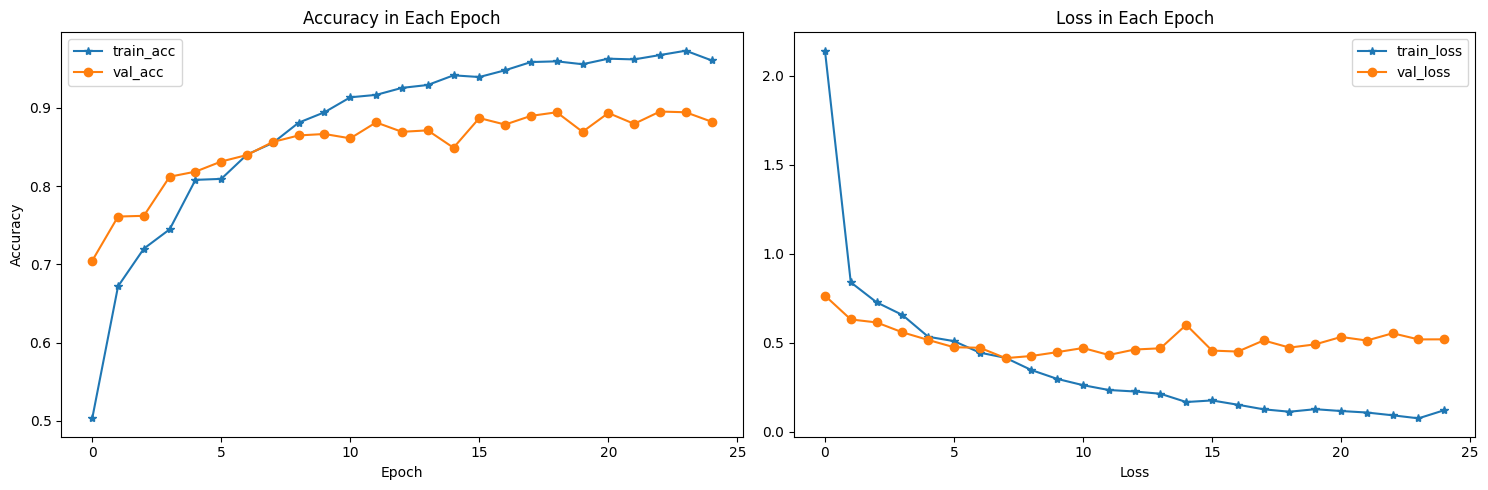

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.plot(model_6.history['accuracy'], marker = '*')
ax1.plot(model_6.history['val_accuracy'], marker = 'o')
ax1.legend(["train_acc", "val_acc"])
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.set_title("Accuracy in Each Epoch")

ax2.plot(model_6.history['loss'], marker = '*')
ax2.plot(model_6.history['val_loss'], marker = 'o')
ax2.legend(["train_loss", "val_loss"])
ax2.set_xlabel("Epoch")
ax2.set_xlabel("Loss")
ax2.set_title("Loss in Each Epoch")

plt.tight_layout()
plt.show()

## Experiment 7

- Used RandomNormal insead of Ones

In [ ]:
network_7 = keras.Sequential(
    [
        Input(shape = (128 * 128,)),
        Dense(512, activation = 'relu', kernel_initializer = initializers.RandomUniform(minval = -1.0, maxval = 1.0), bias_initializer = initializers.RandomNormal(stddev = 0.01)),
        Dense(256, activation = 'relu'),
        Dropout(0.4),
        Dense(256, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(6, activation = 'softmax')
    ]
)

network_7.summary()

network_7.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_7 = network_7.fit(train_images, train_labels, epochs = 25, batch_size = 64, verbose = 1, validation_data = (val_images, val_labels))

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,619,910 (32.88 MB)

 Trainable params: 8,619,910 (32.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.3652 - loss: 4.5069 - val_accuracy: 0.6648 - val_loss: 0.8413
Epoch 2/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6375 - loss: 0.9281 - val_accuracy: 0.7019 - val_loss: 0.7353
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7131 - loss: 0.7405 - val_accuracy: 0.7713 - val_loss: 0.6306
Epoch 4/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7634 - loss: 0.6183 - val_accuracy: 0.8250 - val_loss: 0.5352
Epoch 5/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7960 - loss: 0.5504 - val_accuracy: 0.7981 - val_loss: 0.5666
Epoch 6/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8228 - loss: 0.4848 - val_accuracy: 0.8352 - val_loss: 0.4942
Epoch 7/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8543 - loss: 0.4241 - val_accuracy: 0.8444 - val_loss: 0.4680
Epoch 8/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8792 - loss: 0.3495 - val_accuracy: 0.8472 - val_

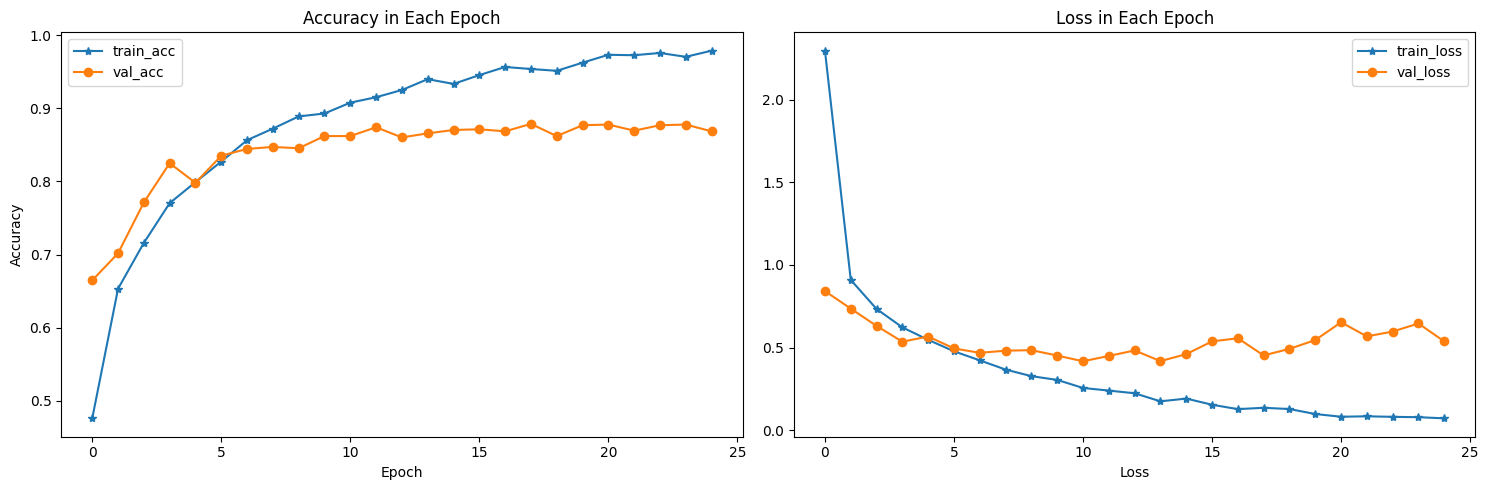

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.plot(model_7.history['accuracy'], marker = '*')
ax1.plot(model_7.history['val_accuracy'], marker = 'o')
ax1.legend(["train_acc", "val_acc"])
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.set_title("Accuracy in Each Epoch")

ax2.plot(model_7.history['loss'], marker = '*')
ax2.plot(model_7.history['val_loss'], marker = 'o')
ax2.legend(["train_loss", "val_loss"])
ax2.set_xlabel("Epoch")
ax2.set_xlabel("Loss")
ax2.set_title("Loss in Each Epoch")

plt.tight_layout()
plt.show()

## Experiment 8

- Increased the number of epochs to 30

In [ ]:
network_8 = keras.Sequential(
    [
        Input(shape = (128 * 128,)),
        Dense(512, activation = 'relu', kernel_initializer = initializers.RandomUniform(minval = -1.0, maxval = 1.0), bias_initializer = initializers.RandomNormal(stddev = 0.01)),
        Dense(256, activation = 'relu'),
        Dropout(0.4),
        Dense(256, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(6, activation = 'softmax')
    ]
)

network_8.summary()

network_8.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_8 = network_8.fit(train_images, train_labels, epochs = 30, batch_size = 64, verbose = 1, validation_data = (val_images, val_labels))

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,619,910 (32.88 MB)

 Trainable params: 8,619,910 (32.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.3772 - loss: 3.2801 - val_accuracy: 0.6519 - val_loss: 0.8939
Epoch 2/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6451 - loss: 0.9054 - val_accuracy: 0.7083 - val_loss: 0.7622
Epoch 3/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7146 - loss: 0.7743 - val_accuracy: 0.8046 - val_loss: 0.5744
Epoch 4/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7651 - loss: 0.6433 - val_accuracy: 0.7954 - val_loss: 0.5692
Epoch 5/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7968 - loss: 0.5373 - val_accuracy: 0.8333 - val_loss: 0.4946
Epoch 6/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8280 - loss: 0.4668 - val_accuracy: 0.8343 - val_loss: 0.4718
Epoch 7/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8684 - loss: 0.4024 - val_accuracy: 0.8370 - val_loss: 0.4832
Epoch 8/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8798 - loss: 0.3474 - val_accuracy: 0.8500 - val_loss

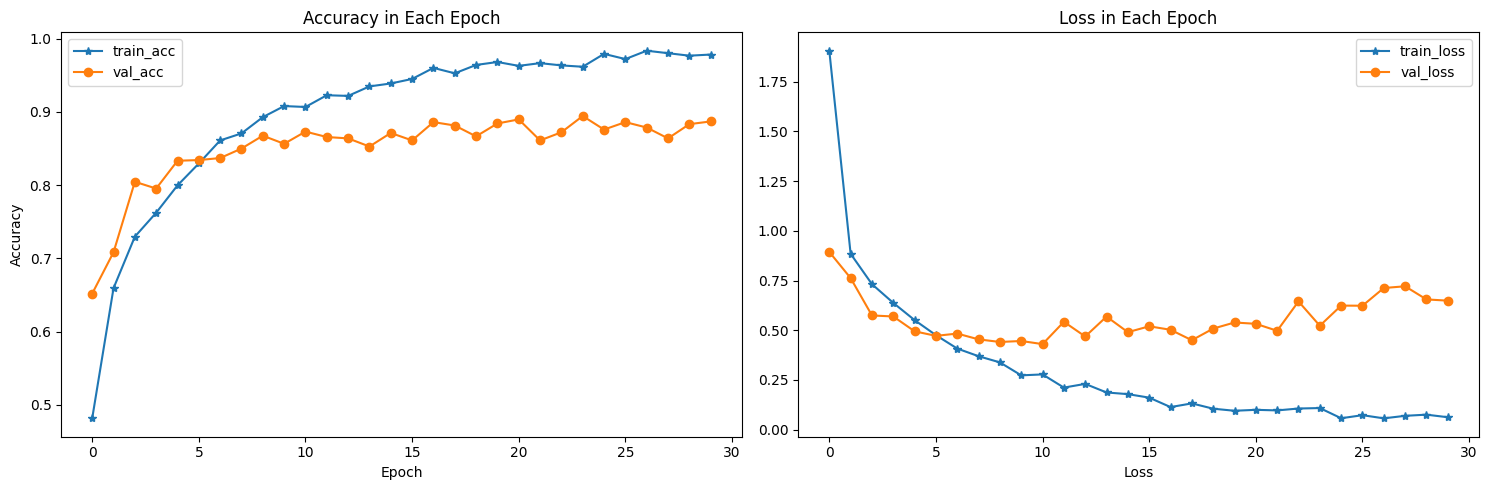

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.plot(model_8.history['accuracy'], marker = '*')
ax1.plot(model_8.history['val_accuracy'], marker = 'o')
ax1.legend(["train_acc", "val_acc"])
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.set_title("Accuracy in Each Epoch")

ax2.plot(model_8.history['loss'], marker = '*')
ax2.plot(model_8.history['val_loss'], marker = 'o')
ax2.legend(["train_loss", "val_loss"])
ax2.set_xlabel("Epoch")
ax2.set_xlabel("Loss")
ax2.set_title("Loss in Each Epoch")

plt.tight_layout()
plt.show()

## Experiment 9
- Increasing the number of epochs to 32

In [ ]:
network_9 = keras.Sequential(
    [
        Input(shape = (128 * 128,)),
        Dense(512, activation = 'relu', kernel_initializer = initializers.RandomUniform(minval = -1.0, maxval = 1.0), bias_initializer = initializers.RandomNormal(stddev = 0.01)),
        Dense(256, activation = 'relu'),
        Dropout(0.4),
        Dense(256, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(6, activation = 'softmax')
    ]
)

network_9.summary()

network_9.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_9 = network_9.fit(train_images, train_labels, epochs = 32, batch_size = 64, verbose = 1, validation_data = (val_images, val_labels))

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                     │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,619,910 (32.88 MB)

 Trainable params: 8,619,910 (32.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/32
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.3716 - loss: 4.1095 - val_accuracy: 0.6667 - val_loss: 0.7917
Epoch 2/32
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6318 - loss: 0.8979 - val_accuracy: 0.7435 - val_loss: 0.6575
Epoch 3/32
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7122 - loss: 0.7547 - val_accuracy: 0.7824 - val_loss: 0.5867
Epoch 4/32
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7588 - loss: 0.6161 - val_accuracy: 0.8056 - val_loss: 0.5595
Epoch 5/32
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7924 - loss: 0.5590 - val_accuracy: 0.8278 - val_loss: 0.5110
Epoch 6/32
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8197 - loss: 0.4763 - val_accuracy: 0.8306 - val_loss: 0.5121
Epoch 7/32
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8540 - loss: 0.4310 - val_accuracy: 0.8574 - val_loss: 0.4563
Epoch 8/32
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8819 - loss: 0.3714 - val_accuracy: 0.8398 - val_

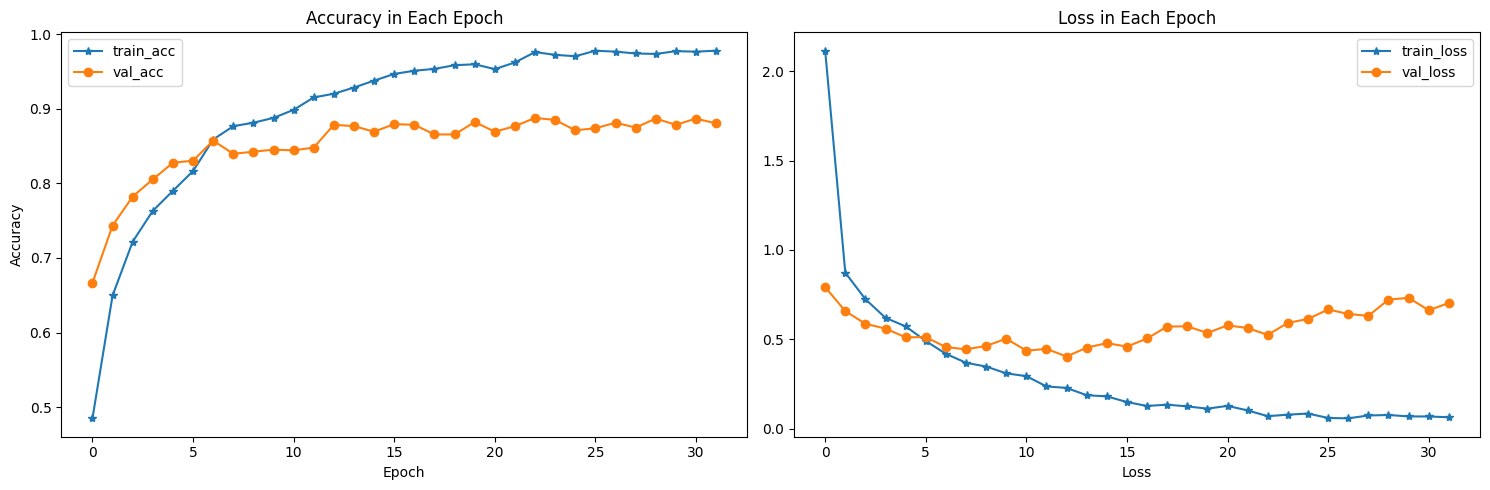

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.plot(model_9.history['accuracy'], marker = '*')
ax1.plot(model_9.history['val_accuracy'], marker = 'o')
ax1.legend(["train_acc", "val_acc"])
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.set_title("Accuracy in Each Epoch")

ax2.plot(model_9.history['loss'], marker = '*')
ax2.plot(model_9.history['val_loss'], marker = 'o')
ax2.legend(["train_loss", "val_loss"])
ax2.set_xlabel("Epoch")
ax2.set_xlabel("Loss")
ax2.set_title("Loss in Each Epoch")

plt.tight_layout()
plt.show()

## Final Model

In [ ]:
# network 7 has the best training and validation accuracy

test_images = test_images.reshape(test_images.shape[0], 128 * 128)
test_images = test_images.astype("float32")/255

test_labels = to_categorical(test_labels)

test_loss, test_acc = network_7.evaluate(test_images, test_labels)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8694 - loss: 0.4995  


## Part 2: Describe what you did (50% of grade)

All the work you did leading up to your final model should be summarized in this section. This should be a logical and well-organized summary of the various experiments that were tried in [Part 1](#cell2), and should be captured in **table format** (see Practice Lab 2 for table structure). Upon reading this section I should understand what you tried, the reasoning behind trying it, any quantitative values that correspond to what you tried, and the results.

See [this guide](https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook) for how to format markdown cells in Jupyter notebooks.

|Exercise | Activation Function | No. Layers (excl. input) | No. Neurons/Layer | Batch Size | No. Epochs | Dropout (Y/N) | No. Parameters | Training Accuracy | Validation Accuracy | Training Loss | Validation Loss | Weight Initializer | Bias Initializer | Learning Rate |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:| :-:|:-:| :-:|:-:|:-:|
| 1 | relu | 4 | 512/256/128/6 | 64 | 16 | N | 8,554,118 | 0.9698 | 0.8560 | 0.0808 | 0.6392 | N | N | N |
| 2 | relu | 6 | 512/256/256/128/6 | 64 | 25 | Y(0.4) | 8,619,910 | 0.9729 | 0.8549 | 0.0826 | 0.6700 | N | N | N |
| 3 | relu | 12 | 1024/512/512/256/256/128/128/128 | 64 | 25 | Y(0.4/0.5/0.4) | 17,829,510 | 0.9460 | 0.8549 | 0.1866 | 0.5739 | N | N | N |
| 4 | relu | 6 | 512/256/256/128/6 | 128 | 25 | Y(0.4) | 8,619,910 | 0.9201 | 0.8498 | 0.2351 | 0.5776 | N | N | 0.0002 |
| 5 | relu | 6 | 512/256/256/128/6 | 64 | 25 | Y(0.4) | 8,619,910 | 0.9715 | 0.8611 | 0.0932 | 0.6043 | RandomNormal(stddev = 0.01) | Ones() | N |
| 6 | relu | 6 | 512/256/256/128/6 | 64 | 25 | Y(0.4) | 8,619,910 | 0.9706 | 0.8529 | 0.0737 | 0.7550 | RandomUniform(minval=-1.0, maxval=1.0) | Ones() | N |
| 7 | relu | 6 | 512/256/256/128/6 | 64 | 25 | Y(0.4) | 8,619,910 | 0.9764 | 0.8611 | 0.0815 | 0.7257 | RandomUniform(minval=-1.0, maxval=1.0) | RandomNormal(stddev = 0.01) | N |
| 8 | relu | 6 | 512/256/256/128/6 | 64 | 30 | Y(0.4) | 8,619,910 | 0.9837 | 0.8601 | 0.0418 | 0.7524 | RandomUniform(minval=-1.0, maxval=1.0) | RandomNormal(stddev = 0.01) | N |
| 9 | relu | 6 | 512/512/128/10 | 64 | 32 | Y(0.4) | 8,619,910 | 0.9708 | 0.8395 | 0.0903 | 0.8684 | RandomUniform(minval=-1.0, maxval=1.0) | RandomNormal(stddev = 0.01) | N |


### References

Please include all references used in completing this lab: books, tutorials, blogs, github, etc.

- [Learning Rate](https://keras.io/api/optimizers/adam/#:~:text=Optimizer%20that%20implements%20the%20Adam)
- [Weight Initializers](https://keras.io/api/layers/initializers/)